## Bulldozer Price Prediction using Machine Learning Model
**********************************************************
## Details of Steps
**1. Problem Definition:**
Predicting the price of bulldozer based on the past sales and characteristics
**2. Data:**
Data are downloaded from `Kaggle` (https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Machine_Appendix.csv)
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

**3. Evaluation:**
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
* Goal for regression model is to minimize the error
  
**4. Features**

## Let's begin with the Regression problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

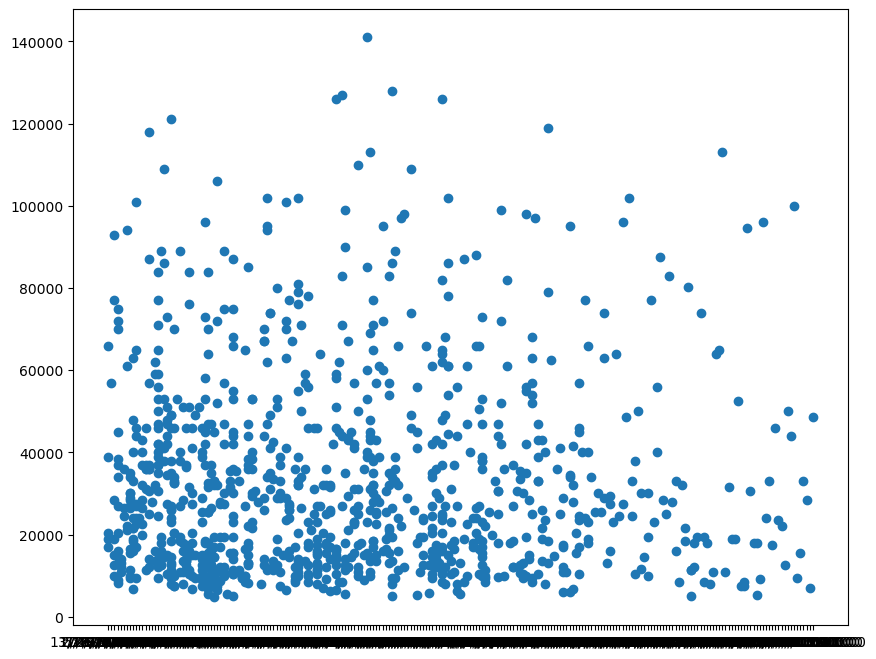

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000])

<Axes: >

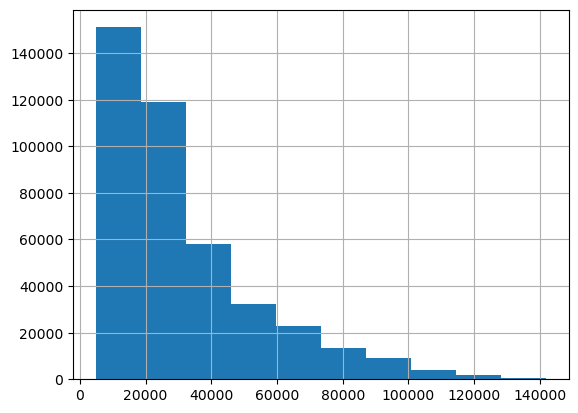

In [7]:
df.SalePrice.hist()

## Parsing Dates
By default python reads `date` as strings but, by using `parse_dates` parameter, we can make code read `date`

In [8]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [9]:
df.saledate.dtype, df.saledate[:20]

(dtype('<M8[ns]'),
 0    2006-11-16
 1    2004-03-26
 2    2004-02-26
 3    2011-05-19
 4    2009-07-23
 5    2008-12-18
 6    2004-08-26
 7    2005-11-17
 8    2009-08-27
 9    2007-08-09
 10   2008-08-21
 11   2006-08-24
 12   2005-10-20
 13   2006-01-26
 14   2006-01-03
 15   2006-11-16
 16   2007-06-14
 17   2010-01-28
 18   2006-03-09
 19   2005-11-17
 Name: saledate, dtype: datetime64[ns])

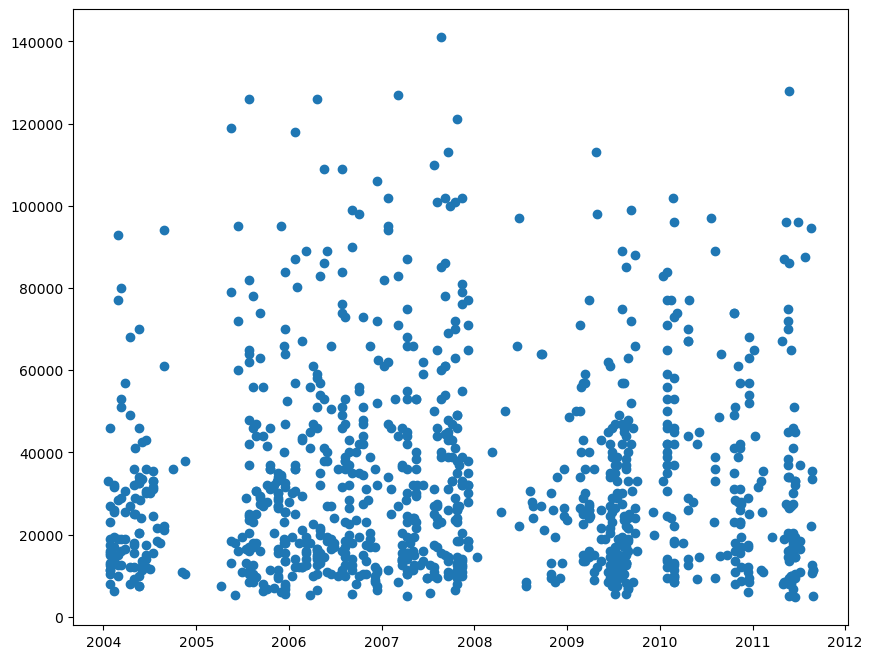

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000])

## Sort DataFrame by saledate
When working with time series data, it's a good idea to sort the data by date

In [11]:
df.sort_values(by=['saledate'], ascending=True, inplace=True)

### Make a copy of the original DataFrame 
We make a copy of original DataFrame so when we manipulate the copy, we've still got our original datam

In [12]:
# Make a copy
df_temp = df.copy()

## Add datetime parameters for `saledate` column

In [13]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDatOfYear'] = df_temp.saledate.dt.dayofyear

In [14]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDatOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [15]:
# Now we've enriched our DataFrame with date time features, lets drop saledate
df_temp.drop('saledate', axis=1, inplace=True)

In [16]:
# Lets check values of different columns
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## Model Driven EDA

In [17]:
# Lets build a machine learning model
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)
model.fit(df_temp.drop('SalePrice', axis=1), df_temp.SalePrice)

ValueError: could not convert string to float: 'Low'

## Converting categorical features to numeric

In [18]:
cat_features = []
for title, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        cat_features.append(title)
cat_features

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [19]:
cat_cols = [col for col in df_temp.columns if df_temp[col].dropna().apply(lambda x: isinstance(x, str)).all()]

In [20]:
cat_cols

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [21]:
for title, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[title] = content.astype('category').cat.as_ordered()
        ## as_ordered() provides order in the categorical column

In [22]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [23]:
df_temp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [24]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [25]:
df_temp.Ripper.cat.categories

Index(['Multi Shank', 'None or Unspecified', 'Single Shank', 'Yes'], dtype='object')

In [26]:
df_temp.Ripper.cat.codes

205615    1
274835   -1
141296    1
212552   -1
62755     1
         ..
410879    0
412476   -1
411927   -1
407124    3
409203   -1
Length: 412698, dtype: int8

## Manipulating missing values

In [27]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

**Saving Preprocessed Data**

In [28]:
df_temp.to_csv('data/train_temp.csv', index=False)

**Import Preprocessed Data**

In [29]:
df_temp = pd.read_csv('data/train_temp.csv', low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [30]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Filling Missing Values
**Fill Numeric Missing Values First**

In [31]:
# Checking which column has missing value
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
# Fill numeric missing value with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+'_is_missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [33]:
# Check if still there is any missing numeric column
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [34]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


**Checking about `label+'is_missing'` column**

In [35]:
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

## Filling and turning categorical variables into numbers

In [36]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding column that shows missing data
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add 1 (To make all value positive as pandas adds -1 values for NaN)
        df_temp[label] = pd.Categorical(content).codes+1

In [38]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [39]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [40]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [41]:
df_temp.T.head(25)

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119,2298,3126,979,2224,82,...,989,536,4261,4818,1319,2101,240,627,83,989


## Training ML model

In [42]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model.fit(df_temp.drop(columns='SalePrice'), df_temp.SalePrice)

CPU times: user 13min 26s, sys: 3.59 s, total: 13min 29s
Wall time: 1min 46s


RandomForestRegressor(n_jobs=-1, random_state=42)

**Scoring our model**
* Default scoring for `Regression Model` is `Coefficient of Determination` or `R^2`

In [43]:
model.score(df_temp.drop(columns='SalePrice'), df_temp.SalePrice)

0.9875468079970562

## Splitting our data in training and validation set

In [44]:
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [45]:
# Split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Evaluating our model using RMSLE (Root Mean Squared Log Error)

In [46]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

#Although there is existing model `RMSLE`, but lets create our own function
def rmsle(y_true, y_pred):
    '''
    Creates Root Mean Squared Log Error
    '''
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Create function to evaluate our model and find the score
def evaluate_model(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        'Training MAE': round(mean_absolute_error(y_train, train_preds), 3),
        'Valid MAE': round(mean_absolute_error(y_valid, valid_preds), 3),
        'Training RMSLE': round(rmsle(y_train, train_preds), 3),
        'Valid RMSLE': round(rmsle(y_valid, valid_preds), 3),
        'Training R^2': round(r2_score(y_train, train_preds), 3),
        'Valid R^2': round(r2_score(y_valid, valid_preds), 3)
    }
    return scores

### Lets reduce data
**If there are huge amount of data, we can reduce size of the data**


**We can use following two methods to reduce data**
1. X_train = X_train[:10000], y_train = y_train[:10000]
2. control max_samples=10000, in RandomForestRegressor()
   
**Reducing data decreases time for training**

In [157]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [158]:
%%time
model.fit(X_train, y_train)

CPU times: user 25.9 s, sys: 242 ms, total: 26.1 s
Wall time: 3.78 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [162]:
%%time
evaluate_model(model)

CPU times: user 5.78 s, sys: 83.3 ms, total: 5.86 s
Wall time: 991 ms


{'Training MAE': 5561.299,
 'Valid MAE': 7177.264,
 'Training RMSLE': 0.258,
 'Valid RMSLE': 0.294,
 'Training R^2': 0.861,
 'Valid R^2': 0.832}

### Hyperparameter Tuning

In [181]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grids = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': np.arange(2, 30, 2),
    'min_samples_leaf': np.arange(1, 30, 2),
    'max_features': [0.5, 1, 2, 4, 'sqrt', 'log2'],
    'max_samples': [10000]
}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grids,
                              n_iter=200,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 3h 35min 23s, sys: 2min 19s, total: 3h 37min 43s
Wall time: 37min 24s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [0.5, 1, 2, 4, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estim...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [182]:
rs_model.best_params_

{'n_estimators': 360,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

**Evaluate our model using custom created function**

In [183]:
%%time
evaluate_model(rs_model)

CPU times: user 15.2 s, sys: 139 ms, total: 15.3 s
Wall time: 2.18 s


{'Training MAE': 5895.711,
 'Valid MAE': 7226.041,
 'Training RMSLE': 0.27,
 'Valid RMSLE': 0.298,
 'Training R^2': 0.846,
 'Valid R^2': 0.834}

## Train Model with best hyperparameters for total datasets

In [53]:
ideal_model = RandomForestRegressor(n_estimators=360,
                              min_samples_leaf=1,
                              min_samples_split=12,
                              max_features=0.5,
                              n_jobs=-1,
                              max_samples=None,
                             random_state=42,
                             max_depth=None)
ideal_model.fit(X_train, y_train)
evaluate_model(ideal_model)

{'Training MAE': 2747.122,
 'Valid MAE': 5897.364,
 'Training RMSLE': 0.136,
 'Valid RMSLE': 0.244,
 'Training R^2': 0.964,
 'Valid R^2': 0.884}

## Make prediction on Test Sets

In [76]:
# Import test data
df_test = pd.read_csv('data/Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [77]:
df_test.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   SalesID                   12457 non-null  bool 
 1   MachineID                 12457 non-null  bool 
 2   ModelID                   12457 non-null  bool 
 3   datasource                12457 non-null  bool 
 4   auctioneerID              12457 non-null  bool 
 5   YearMade                  12457 non-null  bool 
 6   MachineHoursCurrentMeter  12457 non-null  bool 
 7   UsageBand                 12457 non-null  bool 
 8   saledate                  12457 non-null  bool 
 9   fiModelDesc               12457 non-null  bool 
 10  fiBaseModel               12457 non-null  bool 
 11  fiSecondaryDesc           12457 non-null  bool 
 12  fiModelSeries             12457 non-null  bool 
 13  fiModelDescriptor         12457 non-null  bool 
 14  ProductSize               12457 non-nu

## Preprocessing the Test sets in the same way as training data sets

In [78]:
def preprocess_data(df):
    '''
    Performs transformation on df and returns the transformed data
    '''
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDatOfYear'] = df.saledate.dt.dayofyear

    df.drop('saledate', axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    # Fill categorical features and convert to numeric
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [79]:
df_test = preprocess_data(df_test)

In [80]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


**Make prediction on test data**

In [81]:
ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [82]:
# Checking which column is missing
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

**Manually adding `auctioneerID_is_missing` column**

In [91]:
df_test['auctioneerID_is_missing'] = False
# Since Machine Learning model requires features in same order as they are in training sets
df_test = df_test[X_train.columns]

In [92]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


## Lets finally make prediction on test sets

In [97]:
test_preds = ideal_model.predict(df_test)

In [98]:
len(test_preds)

12457

## Format predictions into the same format Kaggle is after

In [99]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17896.333544
1,1227844,17129.037834
2,1227847,49127.971341
3,1227848,66677.386277
4,1227863,57511.570169
...,...,...
12452,6643171,42828.451266
12453,6643173,12916.286599
12454,6643184,13763.314463
12455,6643186,17291.291633


## Export prediction data to csv

In [100]:
df_preds.to_csv('data/test_predictions.csv', index=False)

**As there is no price column in `TeseSets`, we can only predict the price, not evaluate the model**

## Feature Importance
Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variables** (SalePrice)

In [101]:
# Find feature importance of our model
ideal_model.feature_importances_

array([3.38503589e-02, 1.97755519e-02, 4.40522208e-02, 1.78972429e-03,
       3.56709300e-03, 1.98949316e-01, 3.27892796e-03, 1.06347043e-03,
       4.35562848e-02, 4.15087291e-02, 6.56839913e-02, 4.80250814e-03,
       2.04243338e-02, 1.52940386e-01, 4.40188373e-02, 6.39484684e-03,
       2.65274994e-03, 3.07715200e-03, 2.92379625e-03, 6.39836832e-02,
       6.44157416e-04, 7.41800357e-05, 1.11409522e-03, 2.74459116e-04,
       1.24541265e-03, 1.75653905e-04, 1.72514268e-03, 7.88296384e-03,
       1.82731389e-03, 1.35241388e-03, 4.37617641e-03, 3.55712443e-03,
       4.28511415e-03, 1.35305101e-03, 1.79455932e-03, 9.80832145e-03,
       9.05835710e-04, 1.32663284e-02, 1.40887713e-03, 2.46201389e-03,
       1.11042007e-03, 1.02085133e-03, 2.32060184e-03, 6.28324389e-04,
       5.29273660e-04, 3.84433165e-04, 2.87553775e-04, 2.57641623e-03,
       1.05178842e-03, 2.94348371e-04, 5.68219019e-04, 7.34758247e-02,
       4.06875899e-03, 6.20757602e-03, 3.17645011e-03, 1.04287901e-02,
      

In [132]:
# Helper function for plotting features importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        'Features': columns,
        'Feature_Importances': importances,
    }).sort_values(by='Feature_Importances', ascending=False).reset_index(drop=True))

    #Plot the DataFrames
    fig, ax = plt.subplots()
    ax.barh(df['Features'][:n], df['Feature_Importances'][:n], color=['salmon'])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances')
    ax.invert_yaxis()

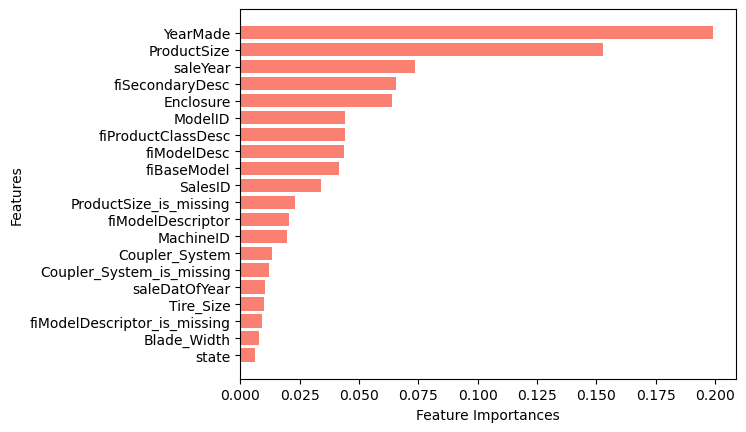

In [133]:
plot_features(X_train.columns, ideal_model.feature_importances_)